In [1]:
from trace_IO import *
from OF_trigger import *
from OF import OptimumFilter  # Replace with actual module path

import matplotlib.pyplot as plt
import numpy as np
import time


sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
# Parameters
energy = 150
n_sets = 100
# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)
of = OptimumFilter(template, noise_psd, sampling_frequency)



In [4]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')
ts = TraceSimulator(config)

In [7]:
trace = ts.generate(E=100, x=-40, y=80, z=-1800, no_noise=False, type_recoil='NR', quantize=True, phonon_only=False)

In [8]:
# Assuming you have already initialized:
# - `trace` as shape (1, 54, 32768) from a simulator
# - `OFtrigger` object as `trigger`
ampl = []
for i in range(trace.shape[1]):
    trace_single = trace[0][i]  # shape: (32768,)
    trace_offset = trace_single[:2048]
    
    mean_val = np.mean(trace_offset)
    std_val = np.std(trace_offset)
    
    amp, chi2, _ = of.fit_with_shift(trace_single)
    ampl.append(amp)
    
    print(f"Trace {i:2d} | Mean: {mean_val: .4f}, Std: {std_val: .4f}, Amp: {amp: .2f}, Chi²: {chi2: .2f}")


Trace  0 | Mean: -0.6006, Std:  5.2802, Amp:  2.20, Chi²:  0.87
Trace  1 | Mean: -0.5659, Std:  5.3663, Amp:  26.36, Chi²:  0.95
Trace  2 | Mean:  0.3716, Std:  5.3714, Amp: -2.32, Chi²:  0.87
Trace  3 | Mean:  1.1343, Std:  5.1995, Amp:  2.25, Chi²:  0.87
Trace  4 | Mean:  0.1118, Std:  5.4679, Amp: -3.03, Chi²:  0.87
Trace  5 | Mean:  0.2520, Std:  5.5817, Amp:  2.87, Chi²:  0.87
Trace  6 | Mean: -0.4536, Std:  5.1887, Amp:  2.40, Chi²:  0.87
Trace  7 | Mean: -0.3638, Std:  5.4449, Amp: -1.92, Chi²:  0.87
Trace  8 | Mean: -0.4204, Std:  5.2281, Amp:  1.94, Chi²:  0.87
Trace  9 | Mean:  1.0308, Std:  5.3539, Amp:  2.51, Chi²:  0.87
Trace 10 | Mean:  1.2163, Std:  5.2574, Amp: -2.31, Chi²:  0.87
Trace 11 | Mean: -0.9053, Std:  5.3737, Amp:  2.86, Chi²:  0.87
Trace 12 | Mean:  0.1050, Std:  5.2574, Amp: -2.05, Chi²:  0.87
Trace 13 | Mean:  0.4438, Std:  5.1186, Amp: -2.46, Chi²:  0.87
Trace 14 | Mean: -0.1919, Std:  5.1194, Amp: -2.13, Chi²:  0.87
Trace 15 | Mean: -0.5039, Std:  5.1786,

In [9]:
np.max(ampl)

26.36468555579685

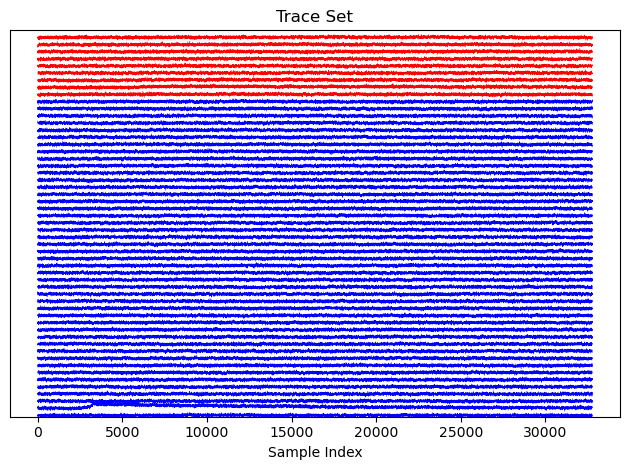

In [10]:
plot_trace_set(trace[0])

In [59]:
trace.shape

(1, 54, 32768)

In [5]:
import matplotlib.pyplot as plt

def plot_trace_set(trace_set, offset=50):
    """
    Plot a single trace set (shape: 54 x N) with vertical offsets.

    Parameters:
    - trace_set: ndarray, shape (54, N)
    - offset: float, vertical offset between channels
    """
    n_channels, n_samples = trace_set.shape

    for i in range(n_channels):
        color = 'r' if i > 44 else 'b'
        plt.plot(np.arange(n_samples), trace_set[i] + i * offset, color=color, lw=0.2)

    plt.xlabel("Sample Index")
    plt.yticks([])
    plt.ylim(-10, offset * n_channels)
    plt.title("Trace Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()
